# Supermarket Spending Analysis

Loading the data and doing basic EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("spending_data.csv")
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000
std,30616.314826,1.05107,6.622895,961.068613
min,10100.000000,0.00000,6.000000,38.000000
25%,29975.000000,0.00000,6.000000,488.250000
50%,53700.000000,1.00000,12.000000,962.000000
75%,77025.000000,2.00000,18.000000,1688.500000
max,168800.000000,3.00000,24.000000,6217.000000


## Relation between Age and home ownership

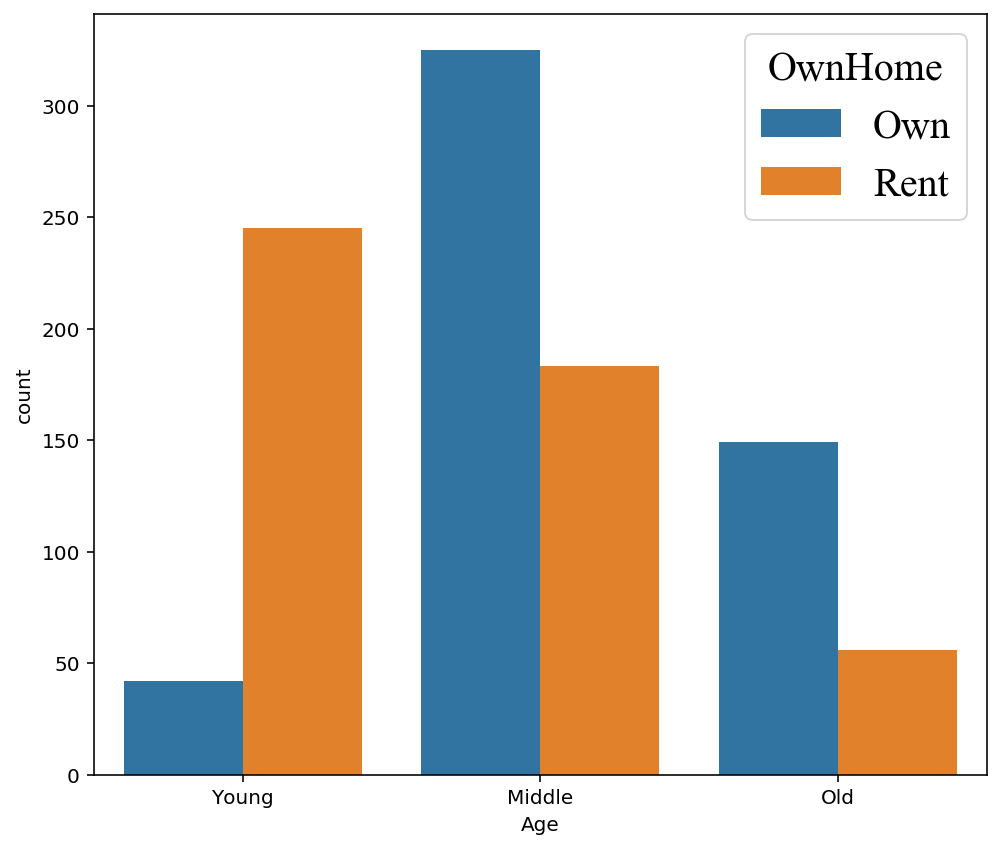

In [7]:
%config InlineBackend.figure_format = 'retina'
import matplotlib

fig, ax = plt.subplots(figsize=(8,7))
font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
ax = sns.countplot(x="Age", hue="OwnHome", data=df, order= ["Young", "Middle", "Old"])

There is a clear tendency that with age, people tend to rent less. However, higher percentage middle aged people own home than renting.

# Relation between History and Catalogs

Text(0, 0.5, 'Count')

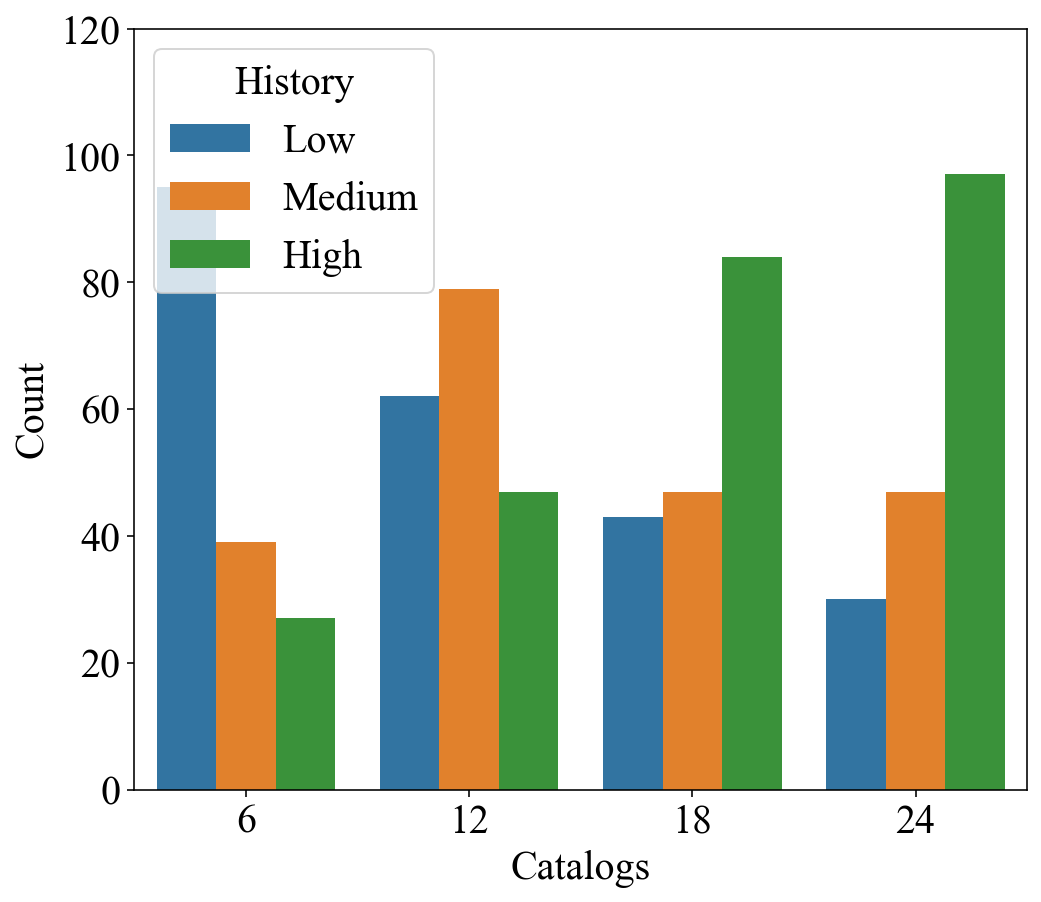

In [8]:
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(8,7))
font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

ax = sns.countplot(x="Catalogs", hue="History", hue_order=["Low", "Medium", "High"], data=df)
plt.ylim(0,120)
plt.ylabel('Count')

When more catalogs are sent, the visit count increases

# Salary vs Age

Text(0, 0.5, 'Probability Density')

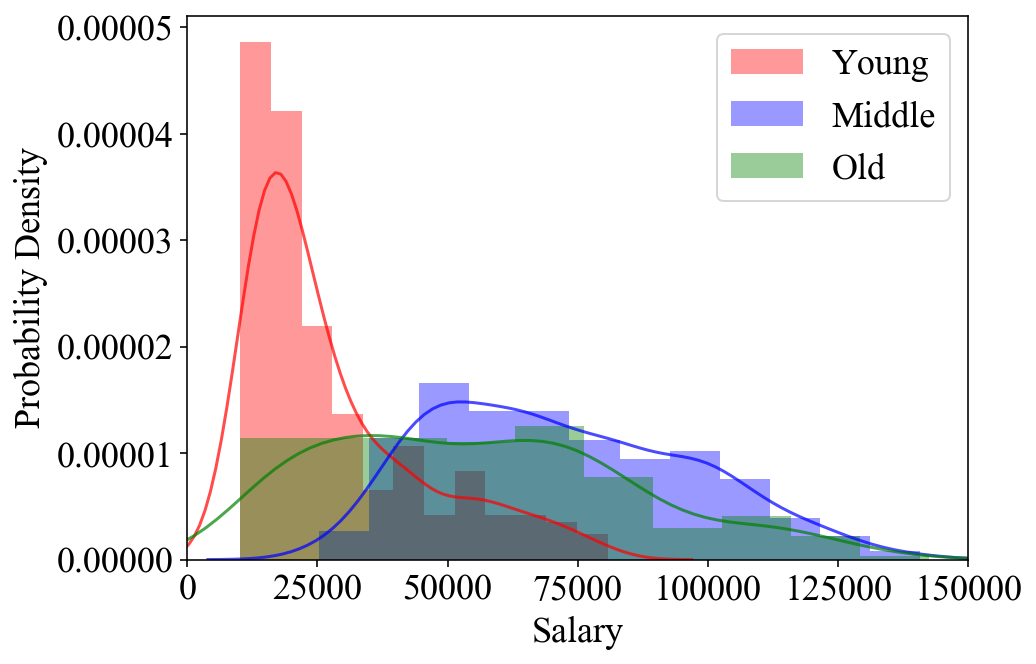

In [11]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

import matplotlib
font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(df.loc[(df['Age']=='Young'), 
            'Salary'], color='r', hist_kws=dict(alpha=0.4), kde_kws=dict(alpha=0.7), label='Young') 

sns.distplot(df.loc[(df['Age']=='Middle'), 
            'Salary'], color='b', hist_kws=dict(alpha=0.4), kde_kws=dict(alpha=0.7), label='Middle')
sns.distplot(df.loc[(df['Age']=='Old'), 
            'Salary'], color='g', hist_kws=dict(alpha=0.4), kde_kws=dict(alpha=0.7), label='Old')
# sns.kdeplot(iris_df.loc[(iris_df['Target']=='Iris_Virginica'),  
#             'Sepal_Length'], color='b', shade=True, Label='Iris_Virginica') 
  
plt.xlim(0,150000)
plt.xlabel('Salary') 
plt.legend()
plt.ylabel('Probability Density')

Salary range spread is broader at middle age compared to young age. Also, the minimum threshold salary of middle aged group is higher than the young and old aged group. Young people earns much less than the middle aged and old people.

# Amonunt Spent vs Age

Text(0, 0.5, 'Probability Density')

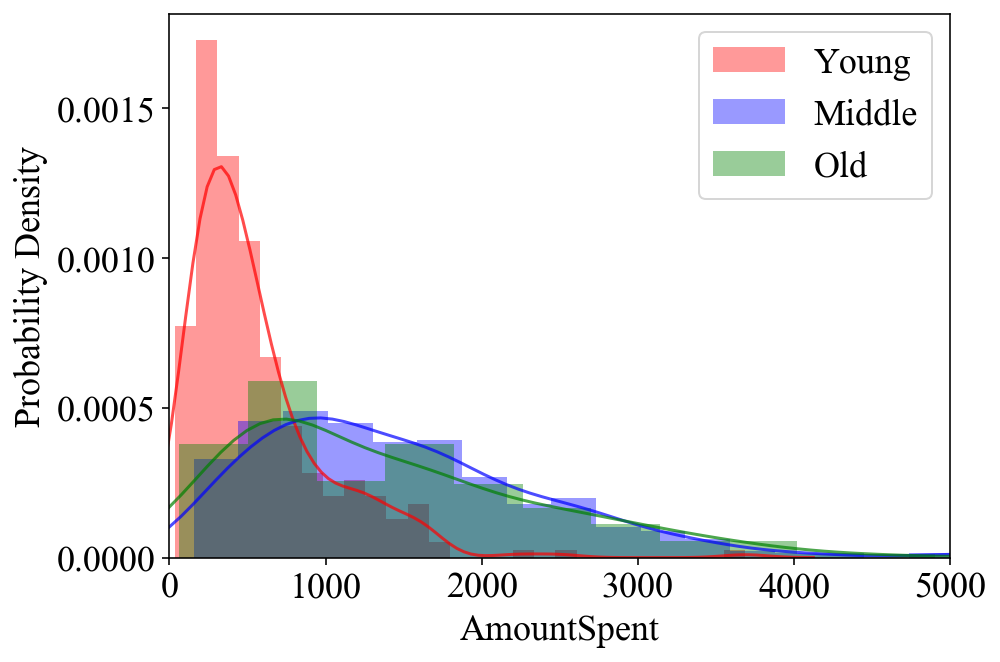

In [16]:
%config InlineBackend.figure_format = 'retina'

import matplotlib
font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(7,5))

sns.distplot(df.loc[(df['Age']=='Young'), 
            'AmountSpent'], color='r', hist_kws=dict(alpha=0.4), kde_kws=dict(alpha=0.7), label='Young') 

sns.distplot(df.loc[(df['Age']=='Middle'), 
            'AmountSpent'], color='b', hist_kws=dict(alpha=0.4), kde_kws=dict(alpha=0.7), label='Middle')
sns.distplot(df.loc[(df['Age']=='Old'), 
            'AmountSpent'], color='g', hist_kws=dict(alpha=0.4), kde_kws=dict(alpha=0.7), label='Old')
# sns.kdeplot(iris_df.loc[(iris_df['Target']=='Iris_Virginica'),  
#             'Sepal_Length'], color='b', shade=True, Label='Iris_Virginica') 
  
plt.xlim(0,5000)
plt.xlabel('AmountSpent') 
plt.legend()
plt.ylabel('Probability Density')

Young aged people spend less money compared to middle and old aged people. There is not much difference in the spending distrbution between middle aged and old people.

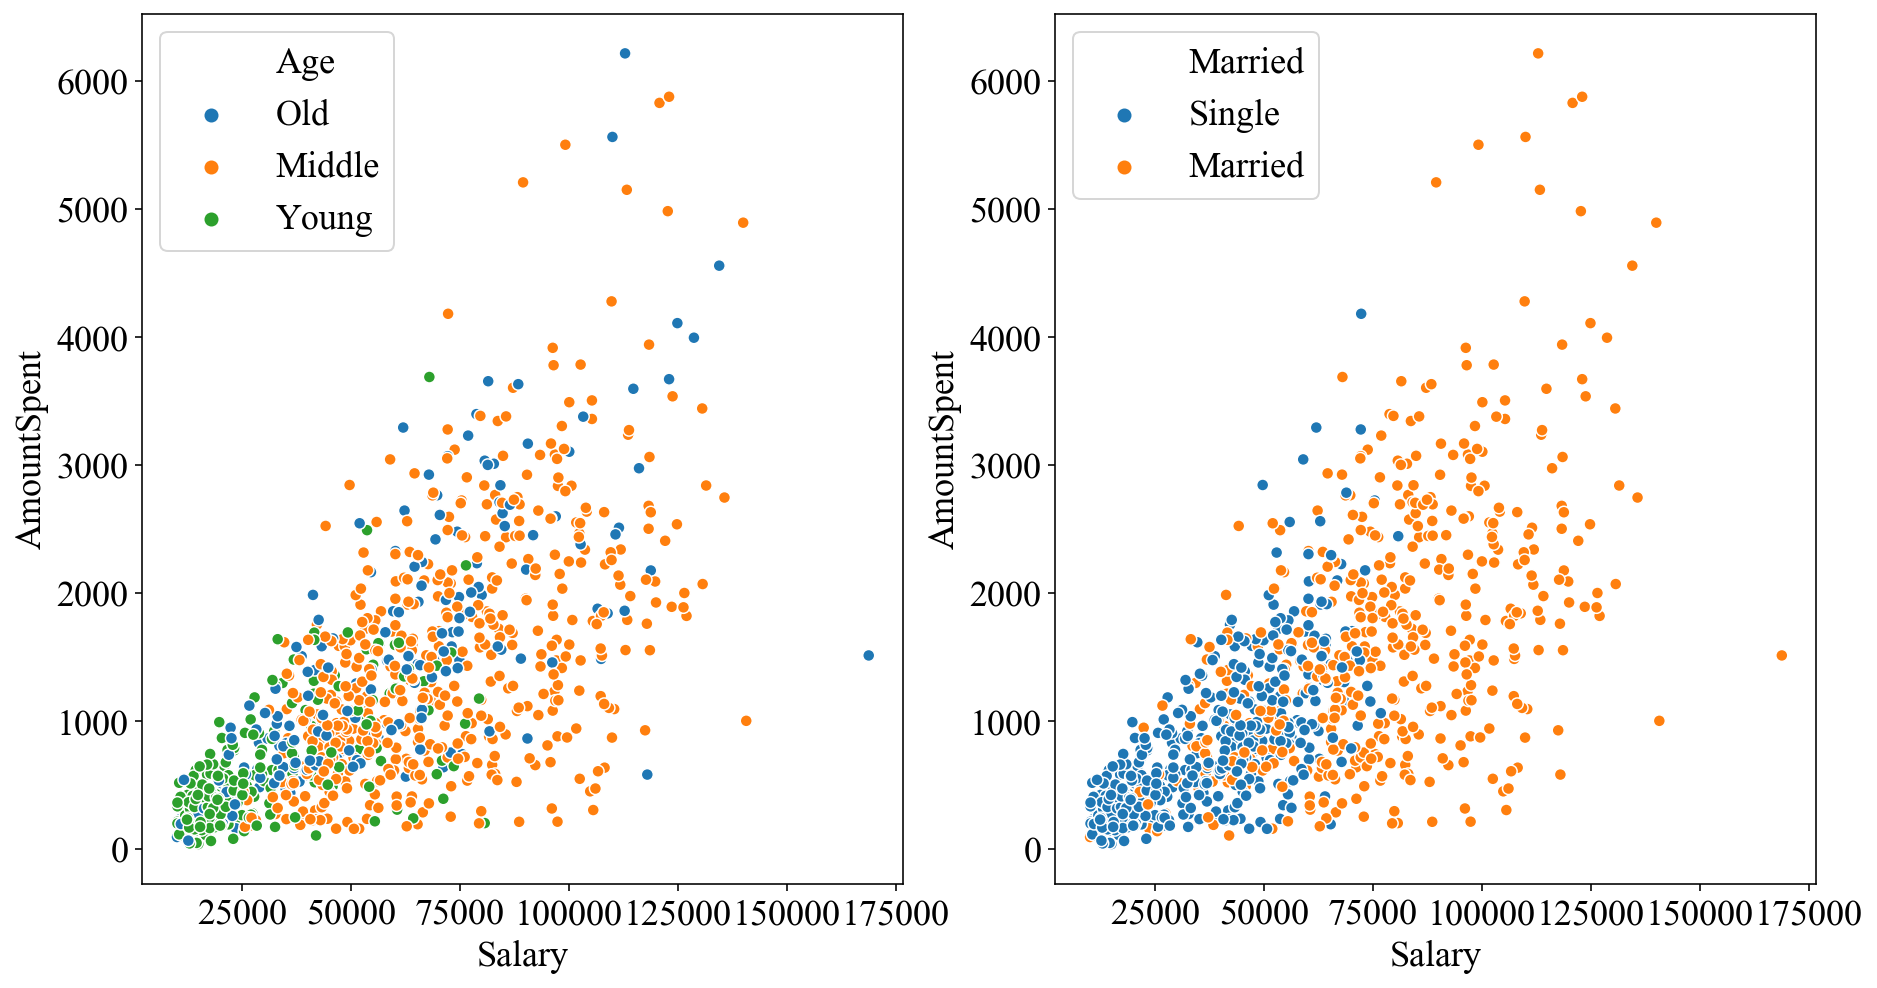

In [15]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
fig, axes =plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(x="Salary", y="AmountSpent", hue="Age", data=df, ax = axes[0])
sns.scatterplot(x="Salary", y="AmountSpent", hue="Married", data=df, ax = axes[1])

# sns.scatterplot(x="Salary", y="AmountSpent", hue="Age", data=df, style= "Location", ax = axes[0])
# sns.scatterplot(x="Salary", y="AmountSpent", hue="Married", data=df, style= "Gender", ax = axes[1])

Both the salary and amount spent for the young people are smaller compared to middle and aged people. This trend is also observed between single and married couple.

# Correlation Matrix

If the variables are numerical, we can calculate pearsson correletaion coefficient between them. e need is something that will look like correlation, but will work with categorical values — or more formally, we’re looking for a measure of association between two categorical features. Introducing: Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test.

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns




def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(df["Location"], df["Age"]).values
cramers_v(confusion_matrix)

# Out[10]: 0.93866193407222209

# confusion_matrix = pd.crosstab(tips["total_bill_cut"], tips["time"]).as_matrix()
# cramers_v(confusion_matrix)

0.0

In [17]:
from scipy.stats.stats import pearsonr

correlation_matrix = np.zeros((len(df.columns), len(df.columns)))
#print(len(df.columns))
for i, column in enumerate(df.columns):
    for j, column1 in enumerate(df.columns):
        confusion_matrix = pd.crosstab(df[column], df[column1]).values
        #print(column, column1)
        if (column == 'Salary' and column1 == 'AmountSpent') or (column1 == 'Salary' and column == 'AmountSpent'):
            correlation_matrix[i, j] = df[column].corr(df[column1])
            
        else:
            correlation_matrix[i, j] = cramers_v(confusion_matrix)        

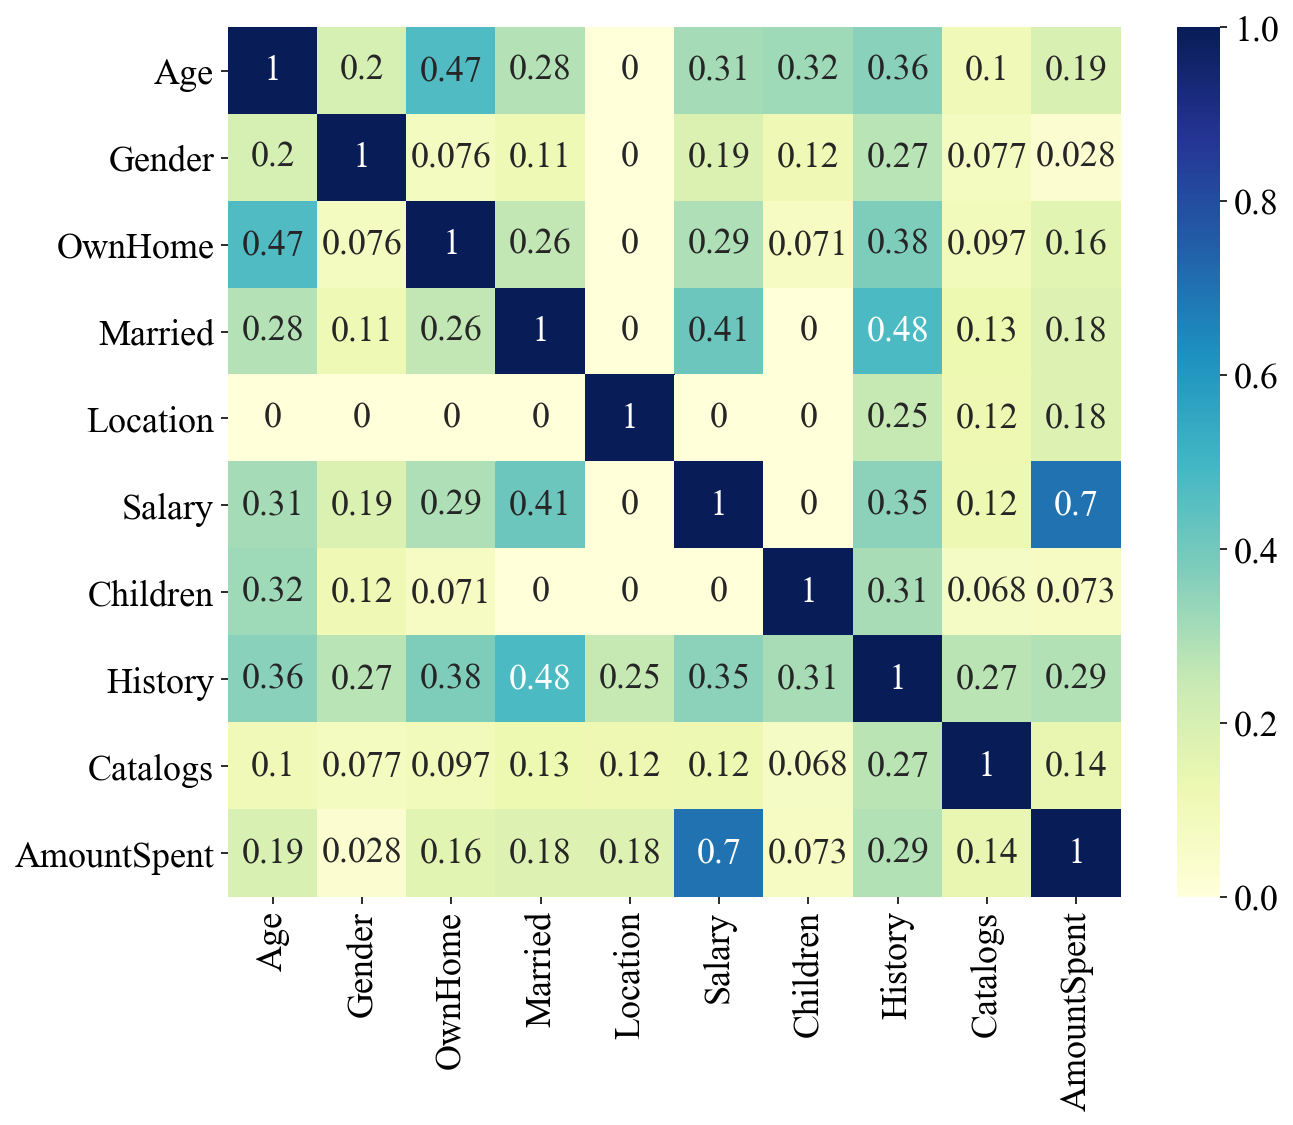

In [18]:
%config InlineBackend.figure_format = 'retina'

import matplotlib
font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1, figsize=(10,8))

ax = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu",
                xticklabels=df.columns, yticklabels=df.columns)

The correlation matrix reveals one interesting observation. The varaiable _Location_ is not even weekly correlated to many of the other variable such a _age_, _Gender_ etc. To see how it looks, we plotted Location of differenr age group people.

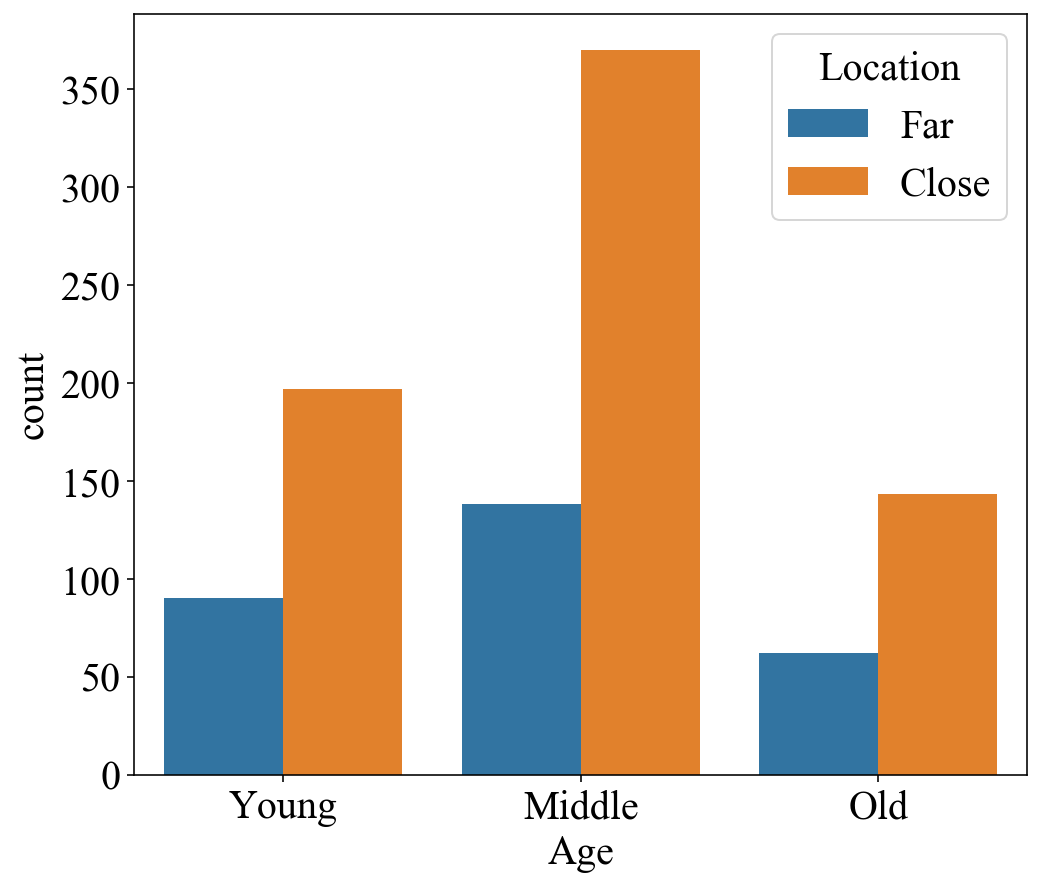

In [20]:
%config InlineBackend.figure_format = 'retina'
import matplotlib

fig, ax = plt.subplots(figsize=(8,7))
font = {'family' : 'Times new roman',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
ax = sns.countplot(x="Gender", hue="Location", data=df)

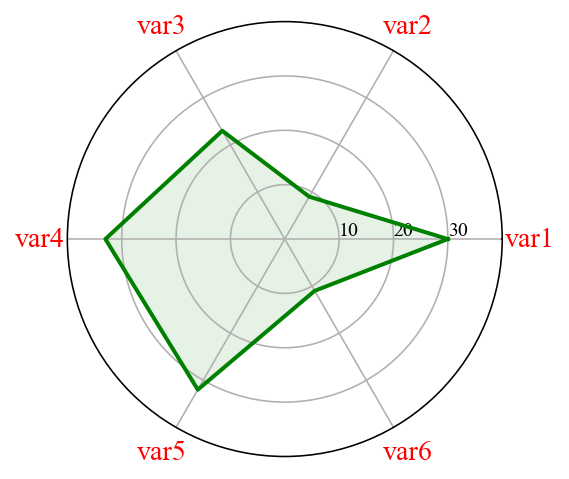

In [142]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14],
'var6': [33, 5, 11, 19]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='red', size=14)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="black", size=10)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=2, linestyle='solid', color="green")
 
# Fill area
ax.fill(angles, values, 'g', alpha=0.1)


[7.00367304 7.42750809 7.09280011 5.66745522 9.77785333]
[0.55475409 0.19471258 0.12400129 0.54797114 0.56545264]


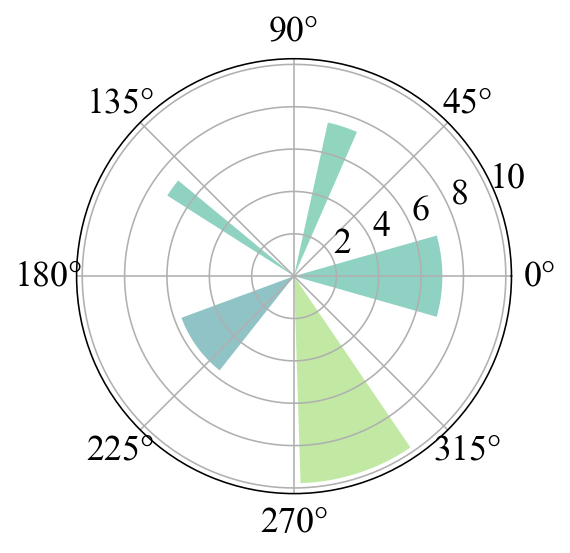

In [150]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 5
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
print(radii)
width = np.pi / 4 * np.random.rand(N)
print(width)
colors = plt.cm.viridis(radii / 12.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

